In [147]:
import os
import tempfile
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np


import sklearn
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [143]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
mpl.rcParams['figure.figsize'] = (12, 10)

In [4]:
data = pd.read_csv('../data/credit_card/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
neg, pos = np.bincount(data['Class'])
total = neg + pos
print(f'Total: {total}\nPositive: {pos} ({100 * pos / total:.2f}% of total)\n')

Total: 284807
Positive: 492 (0.17% of total)



#### Scaling and normalize

In [18]:
eps = 0.0001
data['Amount'] = np.log(data.pop('Amount')+eps)
data['Time'] = np.log(data.pop('Time')+eps)

In [21]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Log Ammount,Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008099,-9.210340
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.989578,-9.210340
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936639,0.000100
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816242,0.000100
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248354,0.693197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.261235,12.059809
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,3.210444,12.059815
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,4.217743,12.059821
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,2.302595,12.059821


#### Splitting

In [27]:
train_df, test_df = train_test_split(data, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

In [28]:
train_df.shape, val_df.shape, test_df.shape

((182276, 31), (45569, 31), (56962, 31))

In [33]:
# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [37]:
train_features

array([[-3.97784830e-01,  3.55195835e-01,  6.28342892e-02, ...,
        -3.74973809e-01,  2.70805687e+00,  1.08255814e+01],
       [ 1.15883527e+00,  3.00917295e-01,  2.69635100e-01, ...,
         3.04478161e-02,  3.89182234e+00,  1.06179803e+01],
       [ 1.91363908e+00,  5.23083080e-01, -8.15189445e-01, ...,
        -5.25372808e-02,  2.90197639e+00,  1.17128659e+01],
       ...,
       [ 5.97761884e-01, -2.71528899e+00, -1.69799872e+00, ...,
         4.82202985e-02,  6.51826209e+00,  1.17958387e+01],
       [-8.69143576e-01, -2.02916840e-01,  1.79179031e+00, ...,
         2.41029096e-02,  4.71849976e+00,  1.19434538e+01],
       [-6.00732075e-01,  6.49531260e-01,  2.48634454e+00, ...,
        -9.92976240e-01,  9.99950003e-05,  1.04779357e+01]])

#### Standard scaling and clipping

In [40]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

#### Data  distribution

In [48]:
pos_data = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_data = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

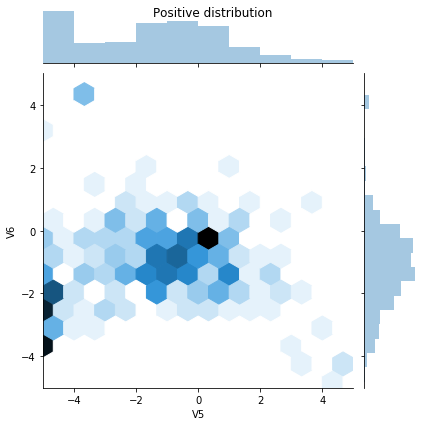

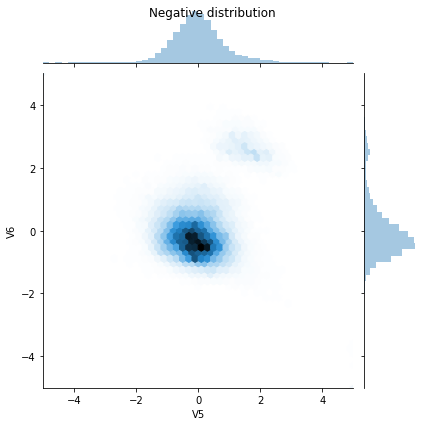

In [53]:
sns.jointplot(pos_data['V5'], pos_data['V6'], kind='hex', xlim = (-5,5), ylim = (-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_data['V5'], neg_data['V6'], kind='hex', xlim = (-5,5), ylim = (-5,5))
_ = plt.suptitle("Negative distribution")

In [59]:
METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'), 
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
]

#### Baseline model

In [63]:
def baseline_model(metrics = METRICS, output_bias=None):
    if output_bias:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias),
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics)
    
    return model

model = baseline_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                496       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [67]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [65]:
model.predict(train_features[:10])

array([[0.3296422 ],
       [0.33848807],
       [0.27128106],
       [0.39990416],
       [0.42296034],
       [0.36864272],
       [0.29280764],
       [0.72507304],
       [0.4670327 ],
       [0.4447553 ]], dtype=float32)

In [68]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print(f'Loss: {results[0]:0.4f}')

Loss: 0.5259


#### with initial bias

In [93]:
initial_bias = np.log([pos/neg])
model = make_model(output_bias = initial_bias)

results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print(f'Loss: {results[0]:0.4f}')

initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

Loss: 0.0187


In [83]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [86]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

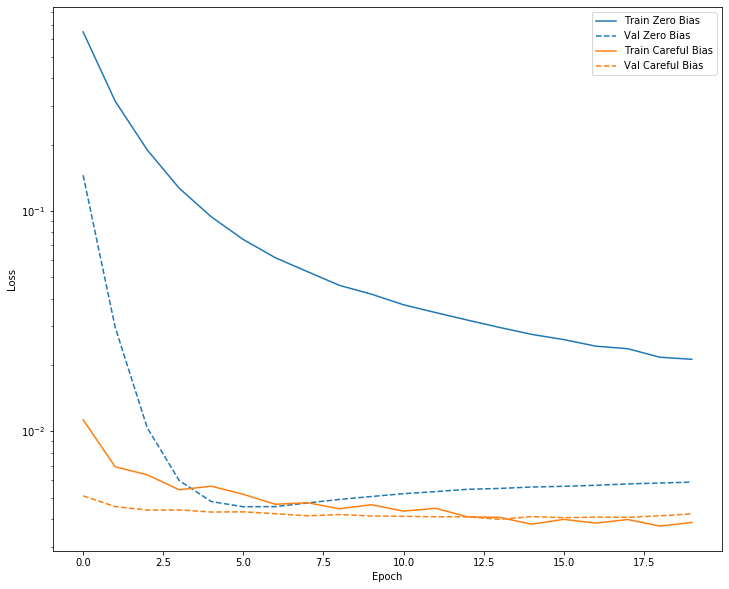

In [98]:
def plot_loss(history, label, n):
    # Use a log scale to show the wide range of values.
    plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
    plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend()
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

#### Train the model

In [94]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))

Train on 182276 samples, validate on 45569 samples
Epoch 1/100
182276/182276 [==============================] - 3s 15us/sample - loss: 0.0136 - tp: 45.0000 - fp: 20.0000 - tn: 181931.0000 - fn: 280.0000 - accuracy: 0.9984 - precision: 0.6923 - recall: 0.1385 - auc: 0.6992 - val_loss: 0.0068 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 45504.0000 - val_fn: 64.0000 - val_accuracy: 0.9986 - val_precision: 1.0000 - val_recall: 0.0154 - val_auc: 0.8303
Epoch 2/100
182276/182276 [==============================] - 1s 3us/sample - loss: 0.0080 - tp: 119.0000 - fp: 28.0000 - tn: 181923.0000 - fn: 206.0000 - accuracy: 0.9987 - precision: 0.8095 - recall: 0.3662 - auc: 0.8658 - val_loss: 0.0050 - val_tp: 19.0000 - val_fp: 5.0000 - val_tn: 45499.0000 - val_fn: 46.0000 - val_accuracy: 0.9989 - val_precision: 0.7917 - val_recall: 0.2923 - val_auc: 0.8766
Epoch 3/100
182276/182276 [==============================] - 1s 5us/sample - loss: 0.0064 - tp: 167.0000 - fp: 27.0000 - tn: 181924.0000 - fn: 1

182276/182276 [==============================] - 1s 4us/sample - loss: 0.0039 - tp: 213.0000 - fp: 34.0000 - tn: 181917.0000 - fn: 112.0000 - accuracy: 0.9992 - precision: 0.8623 - recall: 0.6554 - auc: 0.9300 - val_loss: 0.0040 - val_tp: 41.0000 - val_fp: 10.0000 - val_tn: 45494.0000 - val_fn: 24.0000 - val_accuracy: 0.9993 - val_precision: 0.8039 - val_recall: 0.6308 - val_auc: 0.8996
Epoch 00021: early stopping


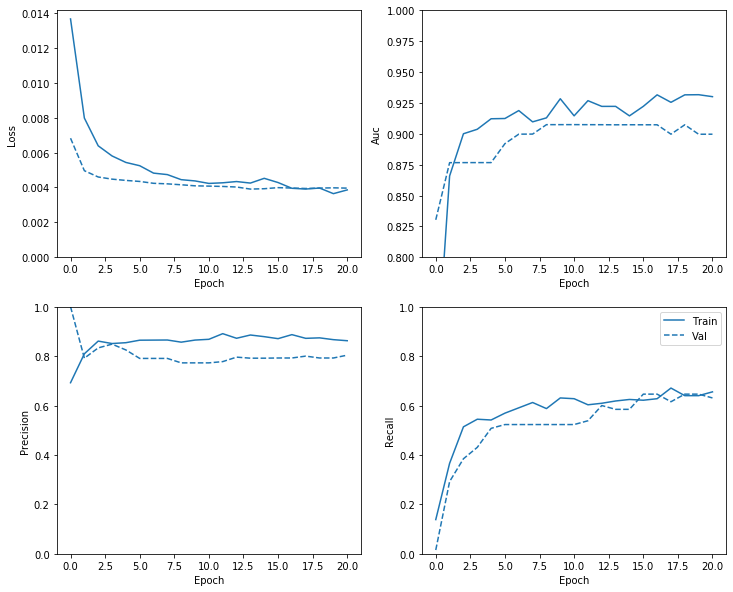

In [99]:
def plot_metrics(history):
    metrics =  ['loss', 'auc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

    plt.legend()
plot_metrics(baseline_history)

#### Evaluate metrics

In [100]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [145]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    return cm

In [146]:
baseline_results = model.evaluate(test_features, test_labels, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
plot_cm(test_labels, test_predictions_baseline)

loss :  0.003202866330893447
tp :  72.0
fp :  9.0
tn :  56851.0
fn :  30.0
accuracy :  0.9993153
precision :  0.8888889
recall :  0.7058824
auc :  0.94097465


array([[56851,     9],
       [   30,    72]])

#### Plot ROC

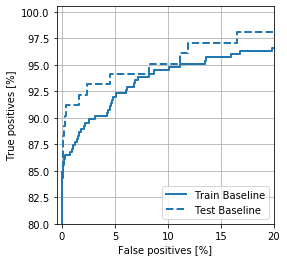

In [148]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

#### Class weights

In [149]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f'Weight for class 0: {weight_for_0:.2f}')
print(f'Weight for class 1: {weight_for_1:.2f}')

Weight for class 0: 0.50
Weight for class 1: 289.44
